In [35]:
class Value:
    """ stores a single scalar value and its gradient """

    # op to define operation
    # children to store the children of the value
    # data to store the value
    def __init__(self, data, _children=(), _op='',label=''):
        self.data = data
        self.grad=0.0 # gradient of the value
        self._prev = set(_children)
        self._op = _op
        self.label= label
    # __ method used to define operator like add, subtract, multiply, divide
    
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other), '+') # self, other are children of the value
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data,(self, other),'*')
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        return out
    
    def __truediv__(self, other):
        if isinstance(other, Value):
            out = Value(self.data / other.data, (self, other), '/')
        else:
            out = Value(self.data / other, (self,), '/')
        return out

    # to return the value
    def __repr__(self):
        return f"Value(data={self.data})"



In [36]:
def lol():
    h=0.0001
    a= Value(2.0, label='a')
    b= Value(-3.0, label='b') # add ing 2 object function is required
    c= Value(10.0, label='c')
    e= a*b
    e.label='e'
    d= e+c
    d.label='d'
    f= Value(-2.0,label='f')
    L= d*f
    L.label='L'
    L1=L # L is the loss function so in back propogation we wish to know derevetive of the leaf nodes a,b,c,d,e,f wrt L
    # so we need to calculate the gradient of L wrt a,b,c,d,e,f
    a= Value(2.0+h, label='a')
    b= Value(-3.0, label='b') # add ing 2 object function is required
    c= Value(10.0, label='c')
    e= a*b
    e.label='e'
    d= e+c
    d.label='d'
    f= Value(-2.0,label='f')
    L= d*f
    L.label='L'
    L2=L # L is the loss function so in back propogation we wish to know derevetive of the leaf nodes a,b,c,d,e,f wrt L
    # so we nee
    # d to calculate the gradient of L wrt a,b,c,d,e,f

    print('L1:',L1)
    print('L2:',L2)
    print('L1-L2:',(L1-L2)/h) # gradient of L wrt a

lol()

L1: Value(data=-8.0)
L2: Value(data=-7.999399999999998)
L1-L2: Value(data=-6.000000000021544)


In [37]:
# manually setting te derivatives or gradients
def lol():
    h=0.0001
    a= Value(2.0, label='a')
    b= Value(-3.0, label='b') # add ing 2 object function is required
    c= Value(10.0, label='c')
    e= a*b
    e.label='e'
    d= e+c
    d.label='d'
    f= Value(-2.0,label='f')
    L= d*f
    L.label='L'
    L1=L # L is the loss function so in back propogation we wish to know derevetive of the leaf nodes a,b,c,d,e,f wrt L
    # so we need to calculate the gradient of L wrt a,b,c,d,e,f
    a.grad= -6.0
    b.grad= 2.0
    c.grad= -2.0
    d.grad= -2.0
    e.grad= -2.0
    f.grad= 10.0
    print('a.grad:',a.grad)
    print('b.grad:',b.grad)
    print('c.grad:',c.grad)
    print('d.grad:',d.grad)
    print('e.grad:',e.grad)
    print('f.grad:',f.grad)
lol()

a.grad: -6.0
b.grad: 2.0
c.grad: -2.0
d.grad: -2.0
e.grad: -2.0
f.grad: 10.0


#### derivative L with respect to f =f
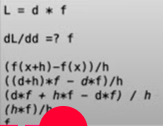

In [13]:
d._prev # resultnt fram a*b and c

{Value(data=-6.0), Value(data=10.0)}

In [14]:
d._op # operation performed

'+'

In [4]:

!python -m pip install graphviz
!pip install micrograd

In [16]:
from graphviz import Digraph
from micrograd.engine import Value
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot
# # a very simple example
# x = Value(1.0)
# y = (x * 2 + 1).relu()
# y.backward()
# draw_dot(y)
# # a simple 2D neuron
# import random
# from micrograd import nn

# random.seed(1337)
# n = nn.Neuron(2)
# x = [Value(1.0), Value(-2.0)]
# y = n(x)
# y.backward()

# dot = draw_dot(y)
# dot
# dot.render('gout')

#### This is how d is vizualized using graphviz

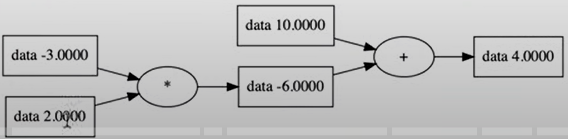

In [38]:
draw_dot(L)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH